In [395]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

h = 6.62607004e-34 #J*s, planck constant
c = 2.99792*1e8 #m/s', speed of light
e = 1.602e-19 #electron charge
d_lambda=1.0 #wavelength step in the solar spectrum (within 5-30 eV range investigated at Elettra)

This is a simple function that reads a file with photoelectron yield data (.txt files with Elettra reults) and saves it in lists:

In [396]:
def read_file(filename):
    photon_E, total_yield, yield_error = [],[],[]

    copy_lines=[]
    with open(filename) as f: #open file
        lines = f.readlines() #read lines

    for line in lines: #split lines
        split_line = line.split()
        copy_lines.append(split_line)

    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one (first one is a header)
        line = copy_lines[i]

        photon_E.append(line[0]) #strip element name and type of commas
        total_yield.append(line[1])
        yield_error.append(line[2])

#extracted values are strings --> cast numbers to floats
    for i in range(0, len(photon_E)):
        photon_E[i] = float(photon_E[i])
        total_yield[i] = float(total_yield[i])
        yield_error[i] = float(yield_error[i])

    return([photon_E, total_yield, yield_error])

Reading results from Elettra:

In [397]:
[Au_90_E, Au_90_TEY, Au_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/Au_90deg_Aug24_2021.txt')
[Ag_90_E, Ag_90_TEY, Ag_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/Ag_90deg_Aug24_2021.txt')
[ITO_Radiator_1_90_E, ITO_Radiator_1_90_TEY, ITO_Radiator_1_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/ITO_Radiator_1_90deg_Aug24_2021.txt')
[ITO_Radiator_2_90_E, ITO_Radiator_2_90_TEY, ITO_Radiator_2_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/ITO_Radiator_2_90deg_Aug24_2021.txt')
[Aerodag_SS_90_E, Aerodag_SS_90_TEY, Aerodag_SS_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/Aerodag_SS_90deg_Aug24_2021.txt')
[Aerodag_Al_90_E, Aerodag_Al_90_TEY, Aerodag_Al_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/Aerodag_Al_90deg_Aug24_2021.txt')
[Graphite_SS_90_E, Graphite_SS_90_TEY, Graphite_SS_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/Graphite_SS_90deg_Aug24_2021.txt')
[LHS_1_simulant_90_E, LHS_1_simulant_90_TEY, LHS_1_simulant_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/LHS-1_simulant_90deg_Aug24_2021.txt')
[ITO_MLI_1_90_E, ITO_MLI_1_90_TEY, ITO_MLI_1_90_TEY_err] = read_file('Elettra_campaign_Aug24_2021_results/ITO_MLI_1_90deg_Aug24_2021.txt')


The following two functions convert wavelength array (in nm) into photon energy (eV), and vice versa:

In [398]:
def convert_nm_to_eV(nm_array):
    eV = 1.602*10e-19 #Joule, electronvolt
    h = 6.62607004*10e-34 #J*s, planck constant
    c = 2.99792*1e8 #m/s', speed of light
    eV_list = []
    for lambda_val in nm_array:
        energy_J = h*c/(lambda_val*1e-9)
        energy_eV = energy_J/eV
        eV_list.append(energy_eV) #in nm
    return(np.array(eV_list))

In [399]:
def convert_eV_to_nm(energy_eV_list):
    # a simple function that takes a list with photon energy values (in eV) and converts them into wavelength in nanometers
    eV = 1.602*1e-19 #Joule, electronvolt
    h = 6.62607004*1e-34 #J*s, planck constant
    c = 3*1e8 #m/s', speed of light
    wavelength_list = []
    for datapoint in energy_eV_list:
        energy_J = datapoint * eV
        wavelength_list.append(h*c/energy_J/(1e-9)) #in nm
    return(wavelength_list)

Next, reading Solar data:

In [400]:
df = pd.read_csv("SORCE_solar_irradiance_1-2370nm.csv") #reading Solar data csv file into a dataframe
wavelength = np.array(df["wavelength (nm)"].tolist()) #convert wavelenth, irradiance, and its error from dataframe columns into arrays
irradiance = np.array(df["irradiance (W/m^2/nm)"].tolist())/1e-9 #convert irradiance from W/m^2/nm to W/m^2/m (from nanometers to meters)
irradiance_err = np.array(df["uncertainty (W/m^2/nm)"].tolist())
df.head() #print header and check if everything is fine

,wavelength (nm),irradiance (W/m^2/nm),uncertainty (W/m^2/nm)
0,0.05,4.830000e-10,NaN
1,0.15,3.800000e-08,NaN
2,0.25,2.890000e-07,NaN
3,0.35,1.000000e-06,NaN
4,0.45,2.660000e-06,NaN


Next, I'm simply plotting the solar irradiance data:

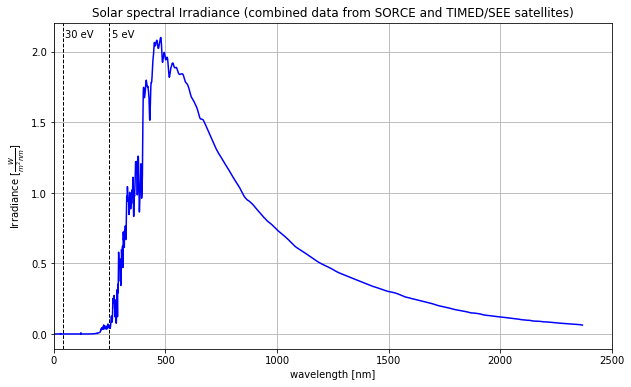

In [401]:
plt.figure(figsize=(10, 6))
plt.errorbar(wavelength,irradiance*1e-9,irradiance_err*1e-9,color='blue')
plt.title("Solar spectral Irradiance (combined data from SORCE and TIMED/SEE satellites)")
plt.xlabel("wavelength [nm]")
plt.ylabel(r"Irradiance [$\frac{W}{m^2 nm}$]")
plt.axvline(x=248.0,linestyle='--',color='black',linewidth=1)
plt.text(x=260,y=2.1,s='5 eV')
plt.axvline(x=41.33,linestyle='--',color='black',linewidth=1)
plt.text(x=50,y=2.1,s='30 eV')
plt.xlim([0,2500])
plt.grid()

plt.savefig('plots/solar_spectrum.png', dpi=300)

Next, I'm superimposing the solar spectrum with a representative example of the photoelectric yield

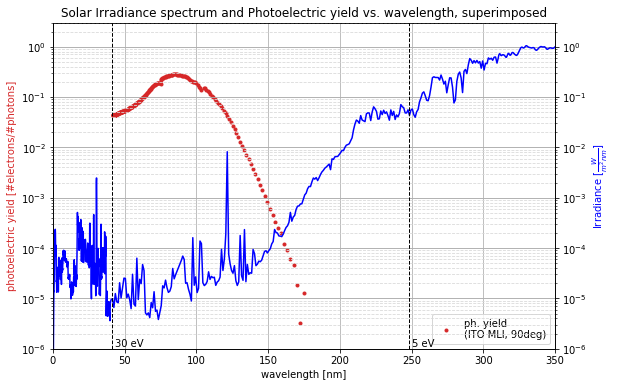

In [402]:
fig, ax1 = plt.subplots(figsize=[9,6])

ax2 = ax1.twinx()

ax2.plot(wavelength,irradiance*1e-9,color='blue')
ax1.plot(convert_eV_to_nm(ITO_MLI_1_90_E)[15:],ITO_MLI_1_90_TEY[15:],'.',label='ph. yield \n(ITO MLI, 90deg)',color='tab:red')
plt.yscale("log")
ax1.set_xlabel("wavelength [nm]")
ax1.set_ylabel("photoelectric yield [#electrons/#photons]",color='tab:red')
ax2.set_ylabel(r"Irradiance [$\frac{W}{m^2 nm}$]",color='blue')
ax1.set_ylim([1e-6,3])
ax2.set_ylim([1e-6,3])
ax1.set_yscale("log")
ax2.set_yscale("log")
plt.xlim([0,350])
ax1.grid()
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.axvline(x=248.0,linestyle='--',color='black',linewidth=1)
plt.text(x=250.0,y=1.1e-6,s='5 eV')
plt.axvline(x=41.33,linestyle='--',color='black',linewidth=1)
plt.text(x=43,y=1.1e-6,s='30 eV')
ax1.legend(loc='lower right')
plt.title("Solar Irradiance spectrum and Photoelectric yield vs. wavelength, superimposed")

plt.savefig('plots/solar_spectrum_yield_superimposed.png', dpi=300)

# GOLD:
plotting and fitting a function to the yield

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


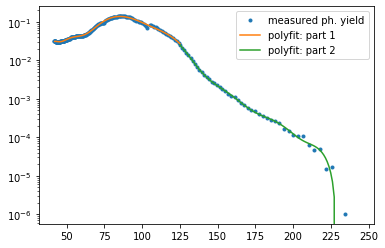

In [403]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 240

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
Au_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(Au_90_E)[10:],Au_90_TEY[10:],deg=16))
Au_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(Au_90_E)[:50],Au_90_TEY[:50],deg=11))

plt.plot(convert_eV_to_nm(Au_90_E),Au_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,Au_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,Au_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

In [404]:
def el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,TEY_fit_1,TEY_fit_2):
    electron_flux = []
    used_lambda = []
    d_lambda = 1.0 #nm
    for i in range(len(wavelength)):
        lambda_val = wavelength[i]
        if lambda_val >= lambda_min and lambda_val <= lambda_max:
            if lambda_val <= lambda_thresh:
                electron_flux_val = TEY_fit_1(lambda_val)*irradiance[i]*(lambda_val*1e-9)*(d_lambda*1e-9)/(h*c)
            else:
                electron_flux_val = TEY_fit_2(lambda_val)*irradiance[i]*(lambda_val*1e-9)*(d_lambda*1e-9)/(h*c)
            electron_flux.append(electron_flux_val)
            used_lambda.append(lambda_val)
    return np.array(used_lambda),np.array(electron_flux)

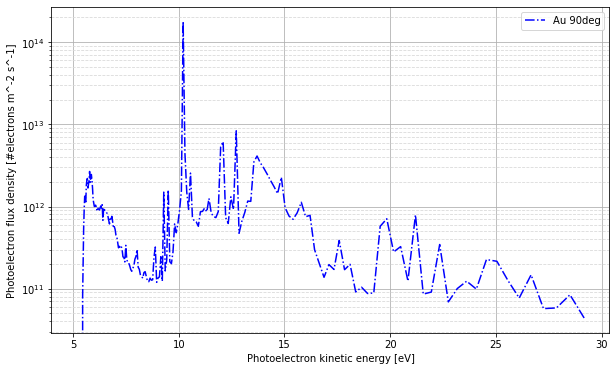

In [405]:
used_lambda_Au,electron_flux_Au = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,Au_fit_1,Au_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Au),electron_flux_Au,'-.',color='blue',label='Au 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/Au_90deg_photoelectron_flux.png', dpi=300)

# ITO MLI 1:

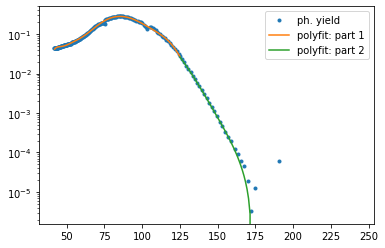

In [406]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 225

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
ITO_MLI_1_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_MLI_1_90_E)[40:],ITO_MLI_1_90_TEY[40:],deg=11))
ITO_MLI_1_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_MLI_1_90_E)[:40],ITO_MLI_1_90_TEY[:40],deg=11))

plt.plot(convert_eV_to_nm(ITO_MLI_1_90_E),ITO_MLI_1_90_TEY,'.',label='ph. yield')
plt.plot(x1,ITO_MLI_1_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,ITO_MLI_1_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

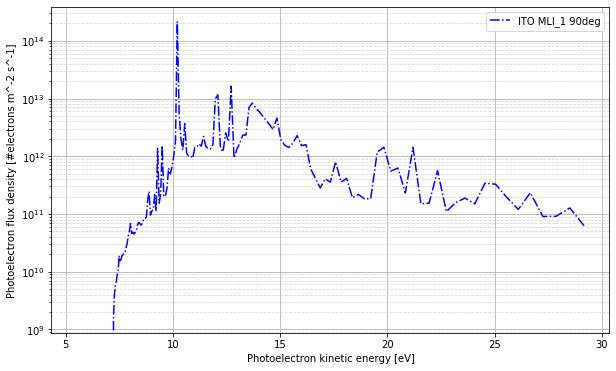

In [407]:
used_lambda_ITO_MLI_1,electron_flux_ITO_MLI_1 = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,ITO_MLI_1_fit_1,ITO_MLI_1_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_ITO_MLI_1),electron_flux_ITO_MLI_1,'-.',color='blue',label='ITO MLI_1 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/MLI_1_90deg_photoelectron_flux.png', dpi=300)

# Ag:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


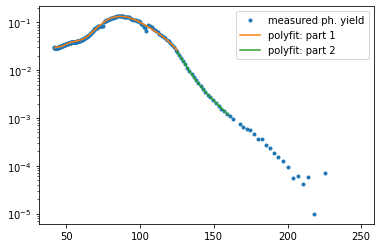

In [408]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 160

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
Ag_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(Ag_90_E)[10:],Ag_90_TEY[10:],deg=16))
Ag_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(Ag_90_E)[:50],Ag_90_TEY[:50],deg=11))

plt.plot(convert_eV_to_nm(Ag_90_E),Ag_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,Ag_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,Ag_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

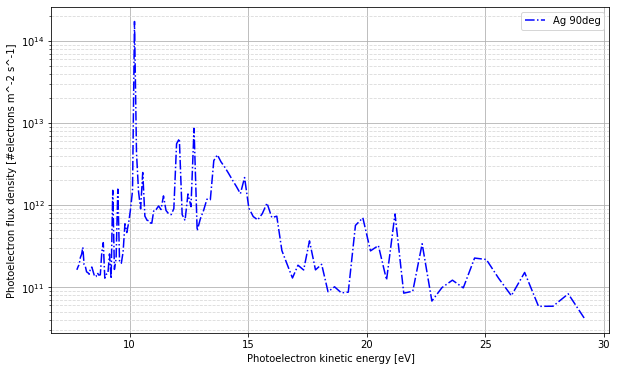

In [409]:
used_lambda_Ag,electron_flux_Ag = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,Ag_fit_1,Ag_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Ag),electron_flux_Ag,'-.',color='blue',label='Ag 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/Ag_90deg_photoelectron_flux.png', dpi=300)

# ITO Radiator 1:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


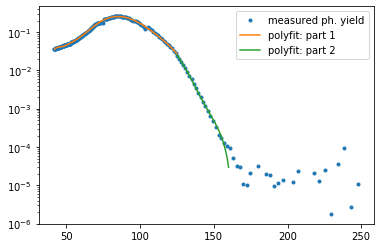

In [410]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 160

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
ITO_Radiator_1_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_Radiator_1_90_E)[10:],ITO_Radiator_1_90_TEY[10:],deg=16))
ITO_Radiator_1_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_Radiator_1_90_E)[:50],ITO_Radiator_1_90_TEY[:50],deg=11))

plt.plot(convert_eV_to_nm(ITO_Radiator_1_90_E),ITO_Radiator_1_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,ITO_Radiator_1_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,ITO_Radiator_1_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

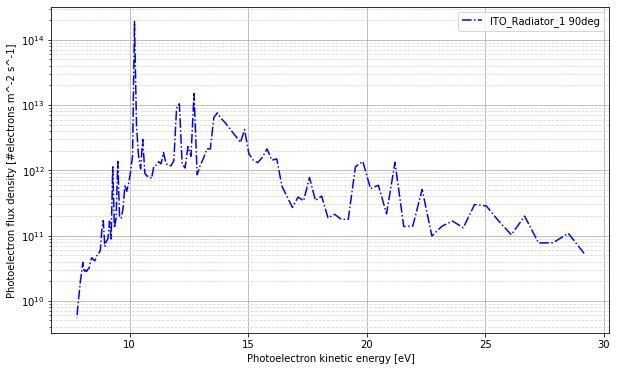

In [411]:
used_lambda_ITO_Radiator_1,electron_flux_ITO_Radiator_1 = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,ITO_Radiator_1_fit_1,ITO_Radiator_1_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_ITO_Radiator_1),electron_flux_ITO_Radiator_1,'-.',color='blue',label='ITO_Radiator_1 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/ITO_Radiator_1_90deg_photoelectron_flux.png', dpi=300)

# ITO Radiator 2:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


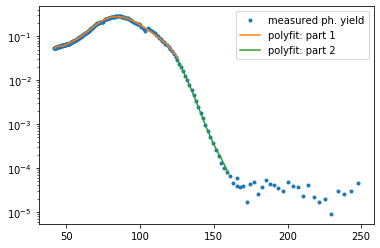

In [412]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 160

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
ITO_Radiator_2_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_Radiator_2_90_E)[10:],ITO_Radiator_2_90_TEY[10:],deg=16))
ITO_Radiator_2_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(ITO_Radiator_2_90_E)[:50],ITO_Radiator_2_90_TEY[:50],deg=11))

plt.plot(convert_eV_to_nm(ITO_Radiator_2_90_E),ITO_Radiator_2_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,ITO_Radiator_2_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,ITO_Radiator_2_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

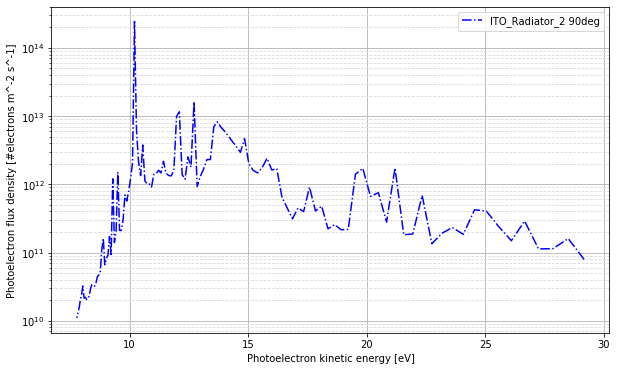

In [413]:
used_lambda_ITO_Radiator_2,electron_flux_ITO_Radiator_2 = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,ITO_Radiator_2_fit_1,ITO_Radiator_2_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_ITO_Radiator_2),electron_flux_ITO_Radiator_2,'-.',color='blue',label='ITO_Radiator_2 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/ITO_Radiator_2_90deg_photoelectron_flux.png', dpi=300)

# Aerodag SS:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


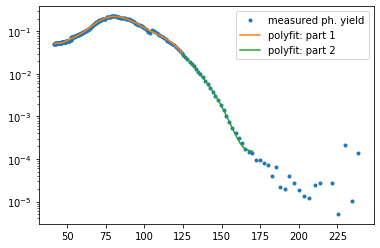

In [414]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 170

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
Aerodag_SS_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(Aerodag_SS_90_E)[10:],Aerodag_SS_90_TEY[10:],deg=16))
Aerodag_SS_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(Aerodag_SS_90_E)[:50],Aerodag_SS_90_TEY[:50],deg=11))

plt.plot(convert_eV_to_nm(Aerodag_SS_90_E),Aerodag_SS_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,Aerodag_SS_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,Aerodag_SS_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

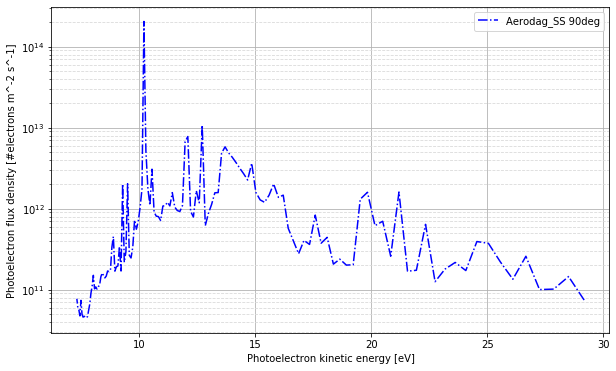

In [415]:
used_lambda_Aerodag_SS,electron_flux_Aerodag_SS = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,Aerodag_SS_fit_1,Aerodag_SS_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Aerodag_SS),electron_flux_Aerodag_SS,'-.',color='blue',label='Aerodag_SS 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/Aerodag_SS_90deg_photoelectron_flux.png', dpi=300)

# Aerodag Al:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


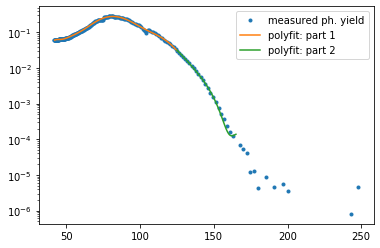

In [416]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 165

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
Aerodag_Al_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(Aerodag_Al_90_E)[10:],Aerodag_Al_90_TEY[10:],deg=16))
Aerodag_Al_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(Aerodag_Al_90_E)[:50],Aerodag_Al_90_TEY[:50],deg=15))

plt.plot(convert_eV_to_nm(Aerodag_Al_90_E),Aerodag_Al_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,Aerodag_Al_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,Aerodag_Al_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

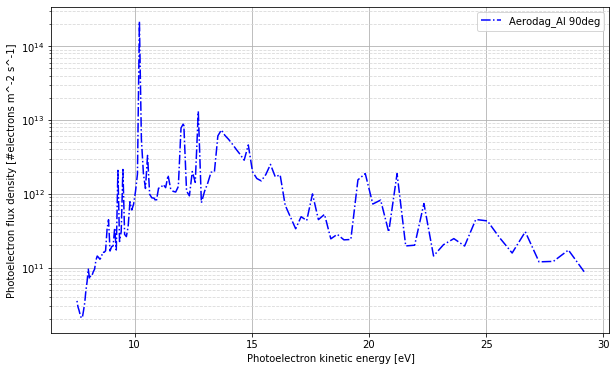

In [417]:
used_lambda_Aerodag_Al,electron_flux_Aerodag_Al = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,Aerodag_Al_fit_1,Aerodag_Al_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Aerodag_Al),electron_flux_Aerodag_Al,'-.',color='blue',label='Aerodag_Al 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/Aerodag_Al_90deg_photoelectron_flux.png', dpi=300)

# Graphite SS

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


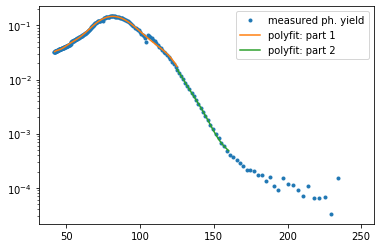

In [418]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 160

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
Graphite_SS_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(Graphite_SS_90_E)[10:],Graphite_SS_90_TEY[10:],deg=16))
Graphite_SS_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(Graphite_SS_90_E)[:50],Graphite_SS_90_TEY[:50],deg=15))

plt.plot(convert_eV_to_nm(Graphite_SS_90_E),Graphite_SS_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,Graphite_SS_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,Graphite_SS_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

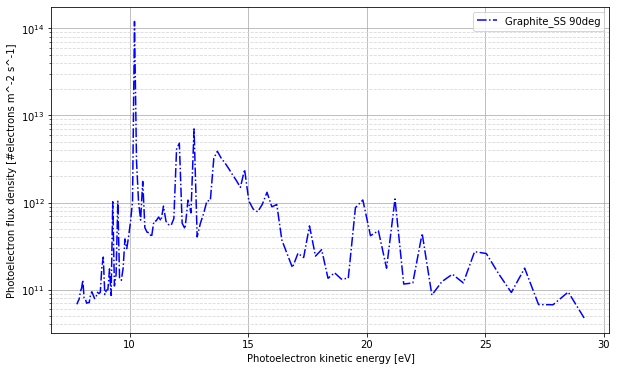

In [419]:
used_lambda_Graphite_SS,electron_flux_Graphite_SS = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,Graphite_SS_fit_1,Graphite_SS_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Graphite_SS),electron_flux_Graphite_SS,'-.',color='blue',label='Graphite_SS 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/Graphite_SS_90deg_photoelectron_flux.png', dpi=300)

# LHS-1 Simulant:

/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


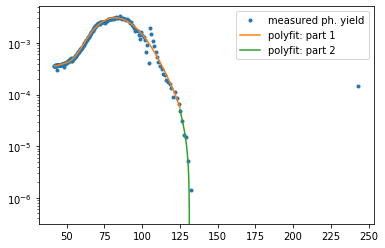

In [420]:
lambda_min = 42
lambda_thresh = 125
lambda_max = 140

x1 = np.linspace(lambda_min,lambda_thresh,100)
x2 = np.linspace(lambda_thresh,lambda_max,100)
LHS_1_simulant_fit_1 = np.poly1d(np.polyfit(convert_eV_to_nm(LHS_1_simulant_90_E)[10:],LHS_1_simulant_90_TEY[10:],deg=16))
LHS_1_simulant_fit_2 = np.poly1d(np.polyfit(convert_eV_to_nm(LHS_1_simulant_90_E)[:50],LHS_1_simulant_90_TEY[:50],deg=15))

plt.plot(convert_eV_to_nm(LHS_1_simulant_90_E),LHS_1_simulant_90_TEY,'.',label='measured ph. yield')
plt.plot(x1,LHS_1_simulant_fit_1(x1),label='polyfit: part 1')
plt.plot(x2,LHS_1_simulant_fit_2(x2),label='polyfit: part 2')
plt.yscale("log")
plt.legend()

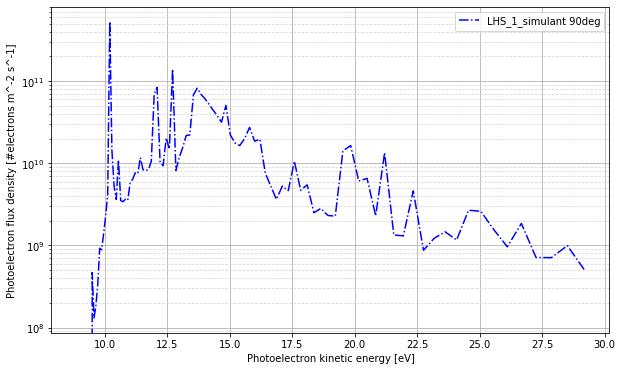

In [421]:
used_lambda_LHS_1_simulant,electron_flux_LHS_1_simulant = el_flux(wavelength,d_lambda,lambda_min,lambda_thresh,lambda_max,LHS_1_simulant_fit_1,LHS_1_simulant_fit_2)

plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_LHS_1_simulant),electron_flux_LHS_1_simulant,'-.',color='blue',label='LHS_1_simulant 90deg')
plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/LHS_1_simulant_90deg_photoelectron_flux.png', dpi=300)

# All materials together:

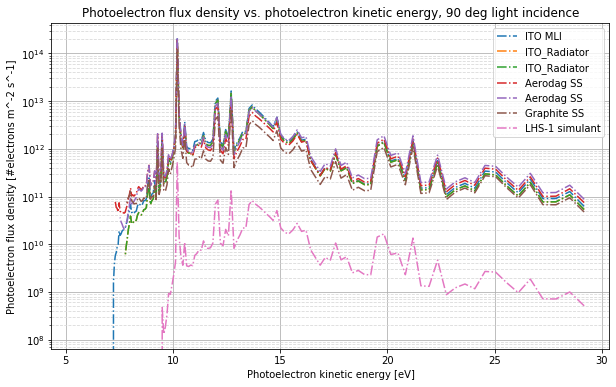

In [423]:
plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_ITO_MLI_1),electron_flux_ITO_MLI_1,'-.',label='ITO MLI')
plt.plot(convert_nm_to_eV(used_lambda_ITO_Radiator_1),electron_flux_ITO_Radiator_1,'-.',label='ITO_Radiator')
plt.plot(convert_nm_to_eV(used_lambda_ITO_Radiator_2),electron_flux_ITO_Radiator_1,'-.',label='ITO_Radiator')
plt.plot(convert_nm_to_eV(used_lambda_Aerodag_SS),electron_flux_Aerodag_SS,'-.',label='Aerodag SS')
plt.plot(convert_nm_to_eV(used_lambda_Aerodag_Al),electron_flux_Aerodag_Al,'-.',label='Aerodag SS')
plt.plot(convert_nm_to_eV(used_lambda_Graphite_SS),electron_flux_Graphite_SS,'-.',label='Graphite SS')
plt.plot(convert_nm_to_eV(used_lambda_LHS_1_simulant),electron_flux_LHS_1_simulant,'-.',label='LHS-1 simulant')

plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.title("Photoelectron flux density vs. photoelectron kinetic energy, 90 deg light incidence")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/all_samples_together_photoelectron_flux.png', dpi=300)

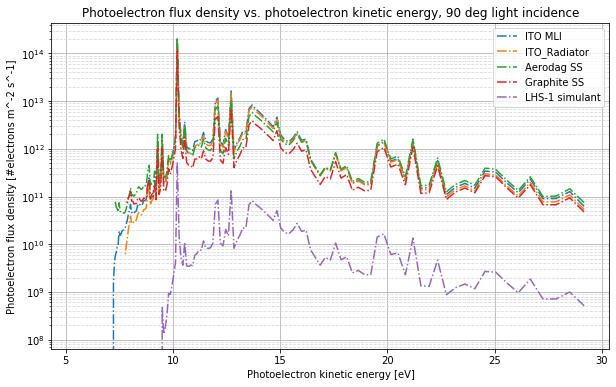

In [422]:
plt.figure(figsize=(10, 6))
plt.plot(convert_nm_to_eV(used_lambda_Au),electron_flux_Au,'-.',label='Au')
plt.plot(convert_nm_to_eV(used_lambda_Ag),electron_flux_Ag,'-.',label='Au')
plt.plot(convert_nm_to_eV(used_lambda_ITO_MLI_1),electron_flux_ITO_MLI_1,'-.',label='ITO MLI')
plt.plot(convert_nm_to_eV(used_lambda_ITO_Radiator_1),electron_flux_ITO_Radiator_1,'-.',label='ITO_Radiator')
plt.plot(convert_nm_to_eV(used_lambda_Aerodag_SS),electron_flux_Aerodag_SS,'-.',label='Aerodag SS')
plt.plot(convert_nm_to_eV(used_lambda_Graphite_SS),electron_flux_Graphite_SS,'-.',label='Graphite SS')
plt.plot(convert_nm_to_eV(used_lambda_LHS_1_simulant),electron_flux_LHS_1_simulant,'-.',label='LHS-1 simulant')

plt.yscale("log")
plt.xlabel('Photoelectron kinetic energy [eV]')
plt.ylabel('Photoelectron flux density [#electrons m^-2 s^-1]')
plt.title("Photoelectron flux density vs. photoelectron kinetic energy, 90 deg light incidence")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.legend()

plt.savefig('plots/some_samples_together_photoelectron_flux.png', dpi=300)